<a href="https://colab.research.google.com/github/dincersipka/sistemlab-perceptron/blob/main/data_0123_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#185260012 - Dinçer Şipka

# Ibrahim R Hallac
# https://github.com/irhallac
# Lojik kapıların Perceptron öğrenme algoritmasıyla modellenmesi
    
# credits for the Perceptron class: Aashir Javed
# Available: github.com/aashirjaved
# Perceptron-Machine-Learning-Using-Python-
# File: Perceptron.py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [ ]:
#CSV verilerini okuyup dataframe olarak tutuyoruz

df = pandas.read_csv('https://raw.githubusercontent.com/irhallac/SisLab/631e5e0b531d22393d9dad47623a0e1de76d8f34/hw_data/data_0123.csv', header=None)
df

,0,1,2,3,4,5,6,7
0,NaN,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,ozellik-6,cikis
1,0.0,-7.43524376807876,-4.174863989374225,8.681144350265372,0.6689198460442981,-6.065572194257408,-2.1846252877118433,0
2,1.0,8.391228868187953,-9.339413646962674,-0.7081285456529649,1.7401474836179736,-3.4131668349248616,-7.336958698185232,1
3,2.0,-5.634695743414545,-3.565606355429833,9.664936352717044,2.732507047261708,-6.960467400518391,-0.8733563835962883,0
4,3.0,-6.330259003798252,-3.8256599344938773,9.589395582499485,0.9173987646197139,-6.954611368784061,-1.565933397485238,0
...,...,...,...,...,...,...,...,...
94,93.0,8.503909184457228,-9.336052548492042,-0.8757955902189782,1.8509760002631763,-4.714561400297591,-5.387236360241952,1
95,94.0,-7.164673617402079,-4.588733694935779,10.326705183017737,1.0559655081441597,-6.221009050070445,-3.4115196336723046,0
96,95.0,8.095333790965675,-9.62138198190637,0.9356796711657802,3.3340071814904526,-4.308568796330791,-7.683909011540598,1
97,96.0,-6.126117305793422,-3.855354201884977,10.318826739106612,2.963437093088043,-6.576239889779095,-2.5396168368122796,0


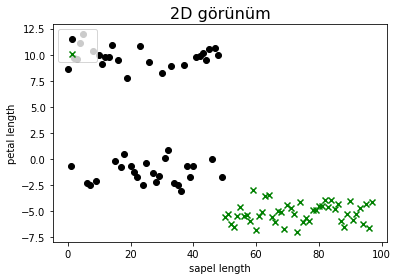

In [ ]:
cikis = df.iloc[1:100, 7].values #Çıkış verilerini tutuyoruz
giris = df.iloc[1:100, [0, 3, 5]].values #Giriş olarak 0,3 ve 5. satırları alıyoruz

#İşlem yapabilmek için giris ve cikis değerlerini float tipine dönüştürüyoruz
giris = giris.astype(float) 
cikis = cikis.astype(float)


#Veri dağılımını göstermek için grafik çizdiriyoruz
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:50, 0], giris[:50, 1], color='black', marker='o', label=' ')
plt.scatter(giris[50:100, 0], giris[50:100, -1], color='green', marker='x', label=' ')
plt.xlabel('sapel length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

plt.show()

In [ ]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1]) #Girişlerin çarpılacağı ağırlık değerlerini veriyoruz, 3 elemanlı bir giriş için 3 ağırlık değeri ve ilk elemana bias değeri veriyor bias değeri hata/sapma değeri
        self.hatalar = [] #Hata sayılarının tutulacağı diziyi oluşturuyoruz
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0] #X değerlerini ağırlık değerleriyle çarpıyoruz

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, 0) #Net_input değeri 0.0 büyük ya da eşitse 1, değilse 0 olacak

In [ ]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=15) #Perceptron sınıfından bir nesne üretiyoruz

siniflandirici.ogren(giris, cikis) #Modeli eğitmek için giriş ve çıkış değerlerini veriyoruz

print("W : ", siniflandirici.w, "\n\nHatalar : ", siniflandirici.hatalar)

W :  [  0.2          4.5        -59.48881549   6.29044181] 

Hatalar :  [2, 19, 14, 12, 14, 14, 14, 14, 12, 1, 2, 0, 0, 0, 0]


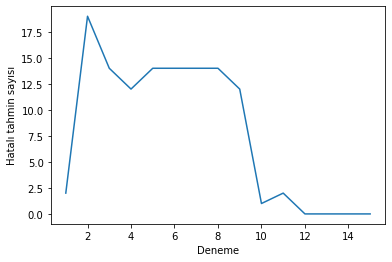

In [ ]:
#İterasyonlarda gerçekleşen hataları göstermek için grafik çiziyoruz

plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()